In [1]:
import numpy as np

from common.array import GradArray
from common.layer import Layer, Linear
from common.loss import MSE
from common.optimizer import SGD
from common.activation import Sigmoid, Tanh, ReLU

import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
class Classifier(Layer): 
    def __init__(self, Activation) -> None:
        self.Activation_ = Activation

        self.fc1 = Linear(2, 100)
        self.act1 = Activation()
        self.fc2 = Linear(100, 1)
        self.act2 = Activation()
        
    def forward(self, x: GradArray) -> GradArray: 
        if self.Activation_ == Sigmoid: 
            return self.act2(self.fc2(self.act1(self.fc1(x))))
        elif self.Activation_ == Tanh: 
            return (self.act2(self.fc2(self.act1(self.fc1(x)))) + 1) / 2
        elif self.Activation_ == ReLU:
            return self.act2(self.fc2(self.act1(self.fc1(x))))
        else: 
            raise ValueError('Invalid Activation')
    
def create_classifier(Activation): 
    return Classifier(Activation)

In [3]:
LogisticClassifier = lambda : create_classifier(Sigmoid)
TanhClassifier = lambda : create_classifier(Tanh)
ReLUClassifier = lambda : create_classifier(ReLU)

Logistic | Tanh | ReLU
:---------:|:-------:|:-------:
![](../figure/logistic_binary_classifier.jpg) | ![](../figure/tanh_binary_classifier.jpg) | ![](../figure/relu_binary_classifier.jpg)

These graphs can be generated by running the following command in the terminal:

```py
from common.graph import backward_graph

out_graph = backward_graph(out)
out_graph.dot_graph_show()
```

This code shows the computational graph of the output of the model in pdf format. 

# OR classifier

In [4]:
x = GradArray(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), name='x')
y = GradArray(np.array([[0], [1], [1], [1]]), name='y') # OR operation

## Logistic Classification

In [5]:
logistic_or_network = LogisticClassifier()
loss = MSE()
optim = SGD(logistic_or_network.get_params(), lr=1e-2)
n_epoch = 1000

In [6]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = logistic_or_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

100%|██████████| 1000/1000 [00:00<00:00, 4284.26it/s]


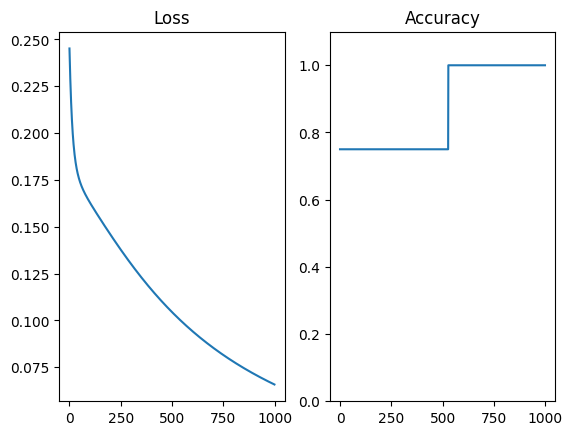

In [7]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.ylim(0, 1.1)
plt.plot(*zip(*acc_list))
plt.show()

## Tanh Classification

In [8]:
tanh_or_network = TanhClassifier()
loss = MSE()
optim = SGD(tanh_or_network.get_params(), lr=1e-3)
n_epoch = 2000

In [9]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = tanh_or_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

100%|██████████| 2000/2000 [00:00<00:00, 4237.98it/s]


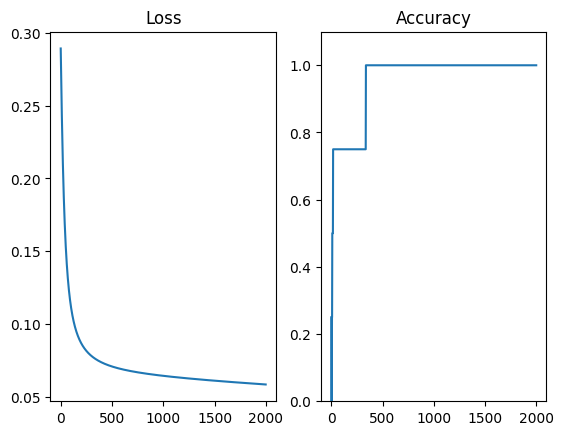

In [10]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.ylim(0, 1.1)
plt.plot(*zip(*acc_list))
plt.show()

# XOR Classifier

In [11]:
x = GradArray(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), name='x')
y = GradArray(np.array([[0], [1], [1], [0]]), name='y') # OR operation

## Logistic Classification

In [12]:
logistic_xor_network = LogisticClassifier()
loss = MSE()
optim = SGD(logistic_xor_network.get_params(), lr=1e-1)
n_epoch = 4000

In [13]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = logistic_xor_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

100%|██████████| 4000/4000 [00:00<00:00, 4366.22it/s]


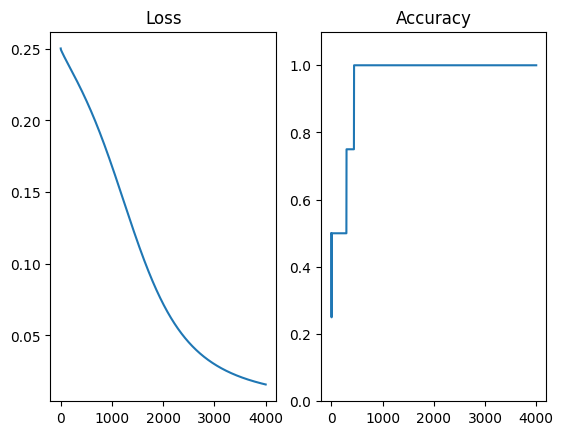

In [14]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.ylim(0, 1.1)
plt.plot(*zip(*acc_list))
plt.show()

## Tanh Classification

In [15]:
tanh_xor_network = TanhClassifier()
loss = MSE()
optim = SGD(tanh_xor_network.get_params(), lr=1e-2)
n_epoch = 1000

In [16]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = tanh_xor_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

100%|██████████| 1000/1000 [00:00<00:00, 4491.25it/s]


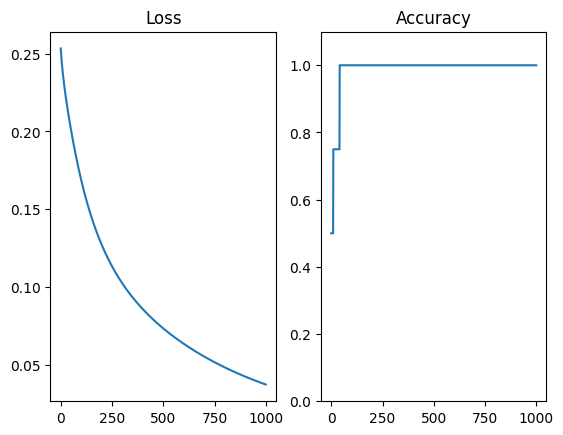

In [17]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.ylim(0, 1.1)
plt.plot(*zip(*acc_list))
plt.show()

## ReLU Classification

In [46]:
relu_xor_network = ReLUClassifier()
loss = MSE()
optim = SGD(relu_xor_network.get_params(), lr=1e-2)
n_epoch = 1000

In [47]:
loss_list = []
acc_list = []
for epoch in tqdm(range(n_epoch)):
    y_pred = relu_xor_network(x)
    l = loss(y_pred, y)
    loss_list.append((epoch, l.item()))
    loss.backward()
    optim.step()

    acc = np.mean((y_pred._array.round() == y._array).astype(np.float32))
    acc_list.append((epoch, acc))

100%|██████████| 1000/1000 [00:00<00:00, 4937.95it/s]


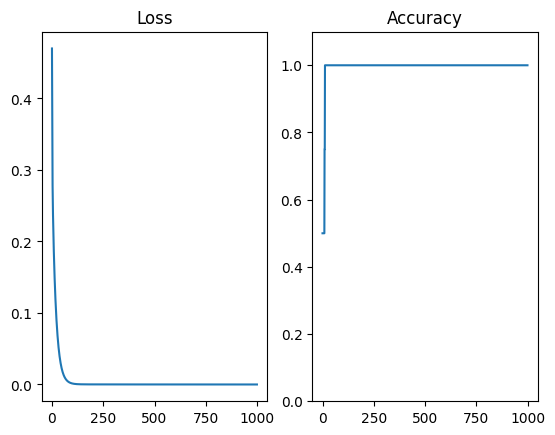

In [48]:
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(*zip(*loss_list))

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.ylim(0, 1.1)
plt.plot(*zip(*acc_list))
plt.show()